https://www.kaggle.com/competitions/big-data-analytics-certification-kr-2022

https://www.kaggle.com/datasets/agileteam/bigdatacertificationkr

https://www.kaggle.com/code/agileteam/4th-t2-python/notebook

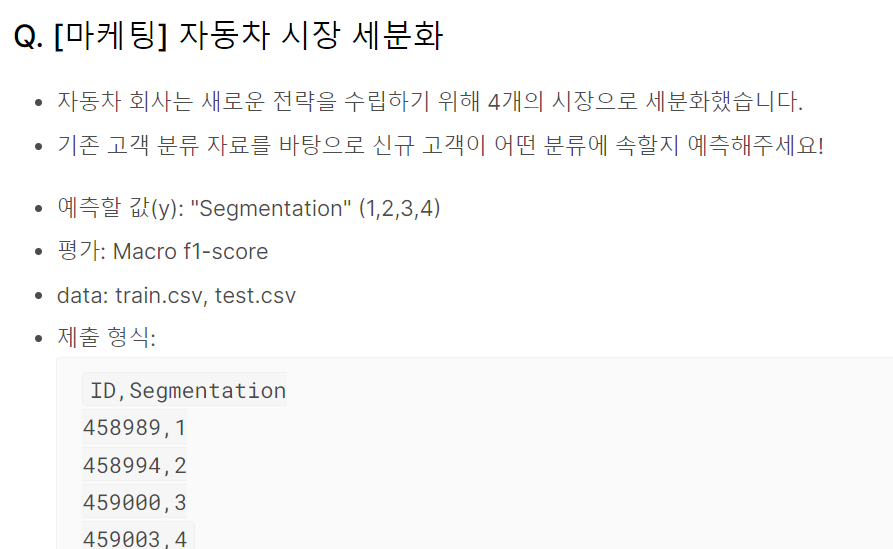

In [1]:
import pandas as pd
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [2]:
train.shape, test.shape 

((6665, 11), (2154, 10))

In [3]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,4
1,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2
2,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2
3,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,3
4,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,3


In [4]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
3,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
4,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6


In [5]:
train['Segmentation'].value_counts()

4    1757
3    1720
1    1616
2    1572
Name: Segmentation, dtype: int64

In [6]:
train.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [7]:
test.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [9]:
train.describe()

,ID,Age,Work_Experience,Family_Size,Segmentation
count,6665.00000,6665.000000,6665.000000,6665.000000,6665.000000
mean,463519.84096,43.536084,2.629107,2.841110,2.542836
std,2566.43174,16.524054,3.405365,1.524743,1.122723
min,458982.00000,18.000000,0.000000,1.000000,1.000000
25%,461349.00000,31.000000,0.000000,2.000000,2.000000
50%,463575.00000,41.000000,1.000000,2.000000,3.000000
75%,465741.00000,53.000000,4.000000,4.000000,4.000000
max,467974.00000,89.000000,14.000000,9.000000,4.000000


In [11]:
train.describe(include = "object")

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
count,6665,6665,6665,6665,6665,6665
unique,2,2,2,9,3,7
top,Male,Yes,Yes,Artist,Low,Cat_6
freq,3677,3944,4249,2192,3999,4476


In [12]:
#  실제 전처리 
target = train.pop('Segmentation')
target

0       4
1       2
2       2
3       3
4       3
       ..
6660    2
6661    4
6662    4
6663    2
6664    2
Name: Segmentation, Length: 6665, dtype: int64

In [13]:
test_ID = test.pop('ID')

In [14]:
# 수치형 컬럼(train)
# ['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation']
num_cols = ['Age', 'Work_Experience', 'Family_Size']
train = train[num_cols]
train.head(2)

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,67,1.0,1.0


In [15]:
# 수치형 컬럼(test)
test = test[num_cols]
test.head(2)

,Age,Work_Experience,Family_Size
0,36,0.0,1.0
1,37,8.0,4.0


In [16]:
# 모델 선택 및 학습
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(train, target)
pred = rf.predict(test)
pred

array([2, 3, 3, ..., 4, 3, 1], dtype=int64)

In [17]:
submit = pd.DataFrame({
    'ID': test_ID,
    'Segmentation': pred
})
submit

,ID,Segmentation
0,458989,2
1,458994,3
2,459000,3
3,459003,3
4,459005,2
...,...,...
2149,467950,1
2150,467954,4
2151,467958,4
2152,467961,3


In [18]:
submit.to_csv("submission.csv", index=False)

In [19]:
# 범주형 변수 활용하는 코드는 아래 URL에서 
# https://www.kaggle.com/code/agileteam/4th-t2-python/notebook